In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from math import *

In [3]:
# Import the Dataset
df = pd.read_csv("uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Dropping the columns Unnamed and key as they do not contain any useful information for us
df.drop(['Unnamed: 0', 'key'], axis= 1,inplace=True)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.shape

(200000, 7)

### Only one na value so we can easily drop it

In [10]:
df = df.dropna()

In [11]:
df.shape

(199999, 7)

In [12]:
# Change the data type of pick_datetime from object to datetime
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


#### Now we try to take out the features hour, day, month, year and day of the week from the pickup_datetime column

In [15]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [16]:
# We drop the pick_datetime column as we have extracted all the useful information from it.
df.drop("pickup_datetime",axis=1,inplace=True)

#### Now we calculate the distance between pickup and dropoff using the latitude and longitude values

In [18]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [19]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,15.704739,6.281791,2011.742434,3.048435,20.855350
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,8.687377,3.438933,1.856400,1.946946,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,16409.239135


#### Here we see some unusual observations in the columns such as min fare amount is -52 which is not possible and minimum pickup longitude is -1340 which is also not possible and so goes for 0 passenger count and dropff longitude and latitude. We see that these values are not correct and therefore remove these wrong data from out dataset.

In [22]:
df = df[df.fare_amount>=0]

In [23]:
df.shape

(199982, 12)

### Removing Outliers from the data

In [25]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [26]:
df = treat_outliers_all(df , df.iloc[: , 0::])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26640\3768313736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)


In [28]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000
mean,10.082222,-73.978311,40.750196,-73.976192,40.750151,1.514341,13.491329,15.705058,6.282045,2011.742357,3.048474,2.854210
std,5.438969,0.020508,0.025659,0.022880,0.028660,0.876694,6.515457,8.687457,3.438948,1.856317,1.946970,2.223710
min,0.000000,-74.029431,40.686251,-74.033030,40.682558,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733824,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215343
50%,8.500000,-73.981823,40.752592,-73.980092,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.121106
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875321
max,22.250000,-73.929788,40.815702,-73.922034,40.819267,3.500000,23.000000,31.000000,12.000000,2015.000000,6.000000,7.865287


#### Now we see that our dataset has no error values also we don't have any outliers. We can check that by drawing boxplots.

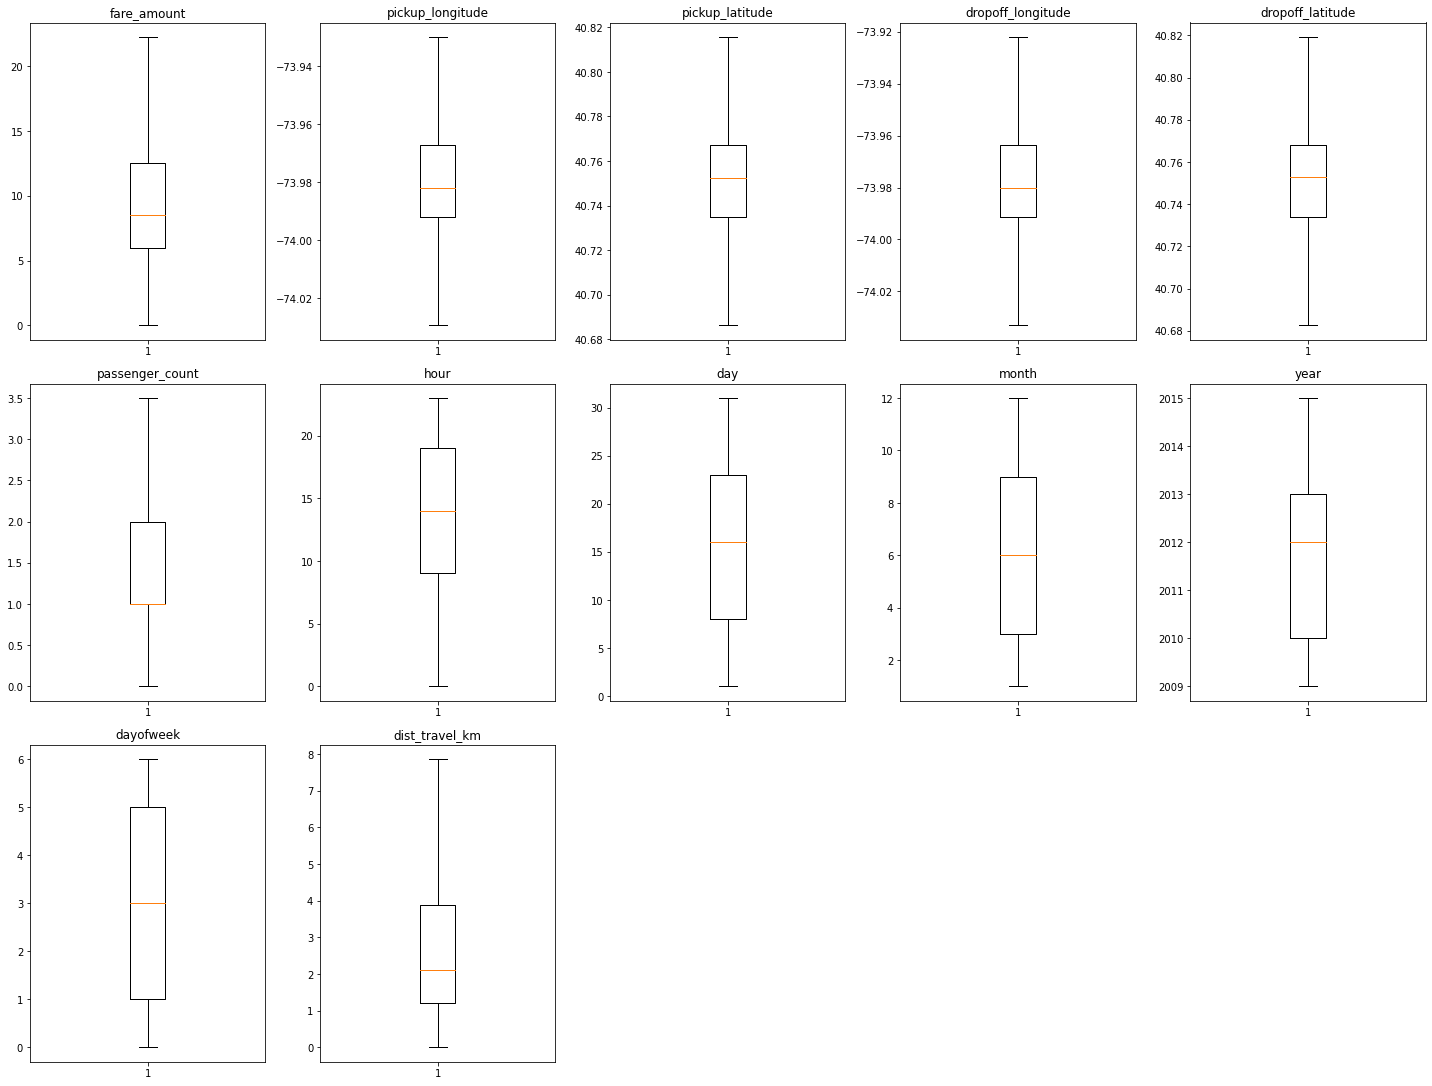

In [33]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### We see from the above box-plots that we dont have any outliers

#### Now we do some data visualization to draw out some insights from the data

<AxesSubplot:xlabel='hour', ylabel='fare_amount'>

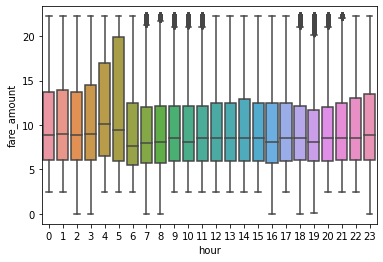

In [47]:
sns.boxplot(x="hour",y="fare_amount",data=df)

#### We see the fare_amount is high during the 4am to 5am. This could be due to the fact that it is quite inconvenient time for drivers and hence they ask for a premium on the rides

<AxesSubplot:xlabel='day', ylabel='fare_amount'>

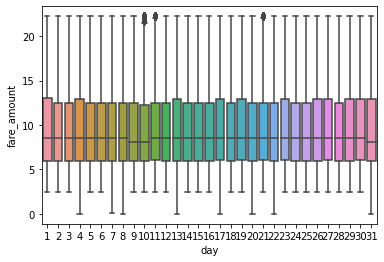

In [48]:
sns.boxplot(x="day",y="fare_amount",data=df)

#### No relation between the day of the month and fare charged

<AxesSubplot:xlabel='dayofweek', ylabel='fare_amount'>

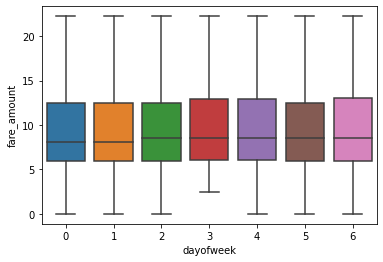

In [50]:
sns.boxplot(x="dayofweek",y="fare_amount",data=df)

#### No relation between the day of the week and fare charged

<AxesSubplot:xlabel='month', ylabel='fare_amount'>

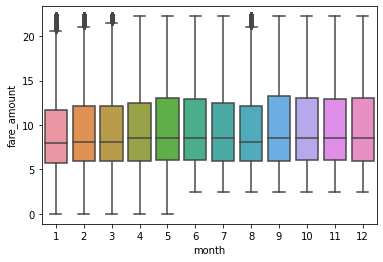

In [51]:
sns.boxplot(x="month",y="fare_amount",data=df)

#### No relation between the month and the fare charged

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dist_travel_km', ylabel='Density'>

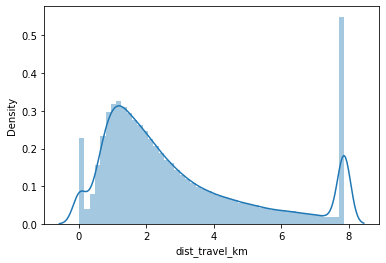

In [60]:
sns.distplot(df.dist_travel_km)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

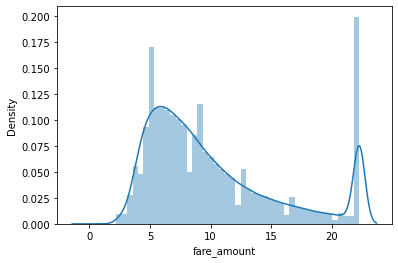

In [59]:
sns.distplot(df.fare_amount)

#### Here we see how the fare_amount and dist_travel_km are distributed

<AxesSubplot:>

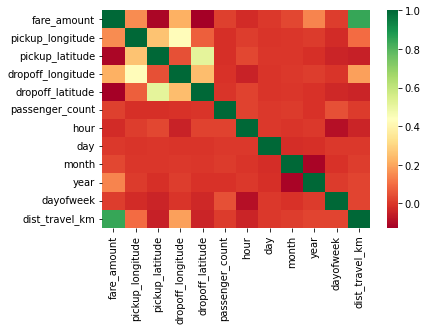

In [63]:
sns.heatmap(df.corr(),cmap = 'RdYlGn')

#### We see that fare_amount is directly correlated with distance travelled which is quite expected. Aside from that we don't see significant correlations among the variables

#### We now plot some countplots to see the demand during different hours and different days

<AxesSubplot:title={'center':'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

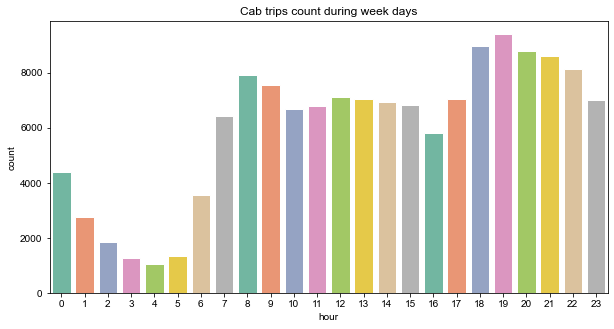

In [66]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')

In [ ]:
#### We see the demand peak around 7pm and the demand is lowest at 4am which seems obvious and intutive.

<AxesSubplot:title={'center':'Cab trips count during week ends'}, xlabel='hour', ylabel='count'>

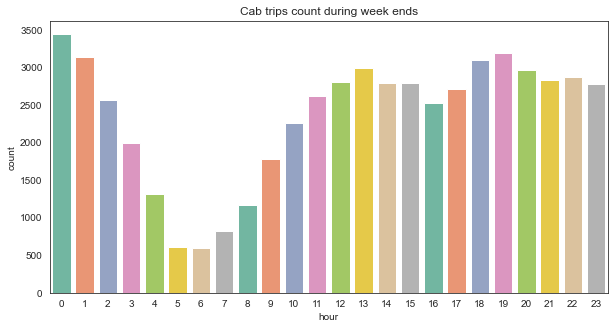

In [68]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week ends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')

#### On the Weekends the demands peaks around 12am and demand is lowest at 5am. One possible explanation to this could be that on weekends people spend time late night due to holidays.

In [69]:
# Set the days in the dataset as week days and week ends
week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).fare_amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).fare_amount.mean().to_frame().reset_index()

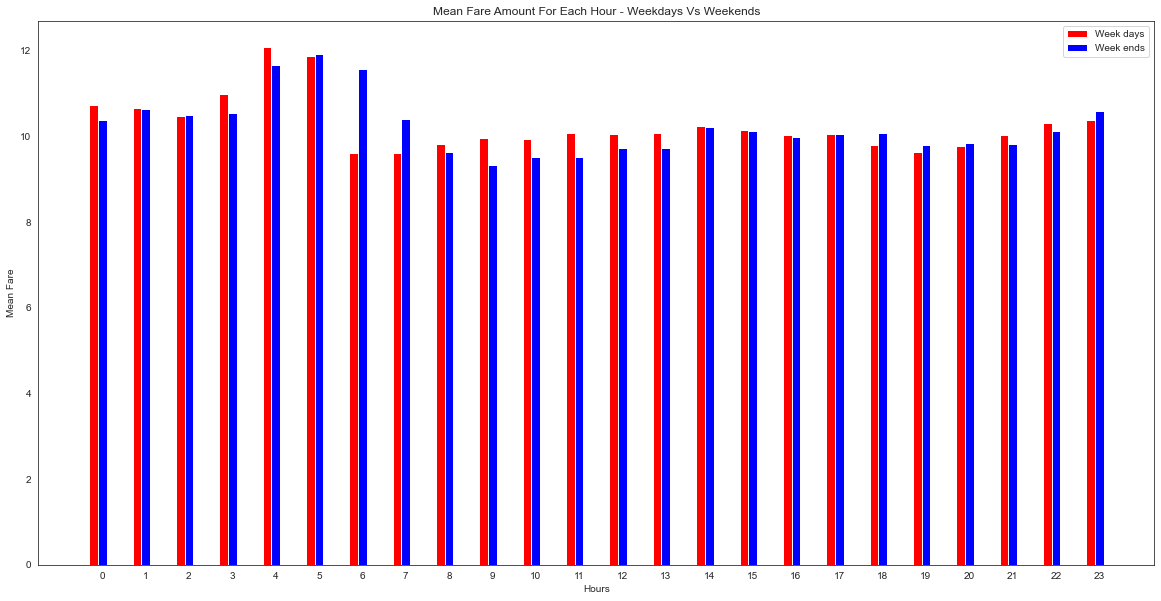

In [70]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.fare_amount)
# an array of week end fare
z = np.array(week_ends_fare.fare_amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amount For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

#### Not much difference between the mean fare amount during weekend and weekdays.

## Fitting Models

In [71]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df['fare_amount'])
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
x = df.drop('fare_amount',axis = 1)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450


In [73]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (159985, 11)
The shape of X_test is: (39997, 11)
The shape of y_train is: (159985, 1)
The shape of y_test is: (39997, 1)


### OLS

In [74]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full = sm.OLS(y_train, x_train).fit()

# print the summary output
print(linreg_full.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.320e+05
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        18:44:05   Log-Likelihood:                     -3.9080e+05
No. Observations:              159985   AIC:                                  7.816e+05
Df Residuals:                  159974   BIC:                                  7.817e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [107]:
linreg_full_predictions = linreg_full.predict(x_test)
actual_fare = y_test["fare_amount"]

In [108]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )
linreg_full_rmse

2.7434667719312174

In [109]:
# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared
linreg_full_rsquared

0.9410169731044441

In [111]:
# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 
linreg_full_rsquared_adj

0.941012917362287

### The models we use next are require data to be scaled so they work properly.

In [84]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [85]:
scaler= StandardScaler()
scaler.fit(x)

StandardScaler()

In [86]:
x1= scaler.fit_transform(x)
x1

array([[-1.04868211, -0.46151352, -1.01921702, ...,  1.75490021,
        -0.0248974 , -0.52654785],
       [-0.78235151, -0.85625781, -0.80934967, ..., -1.4773142 ,
         0.48872259, -0.17835989],
       [-1.30351527, -0.36734484,  0.59560268, ..., -1.4773142 ,
        -1.56575737,  0.98132085],
       ...,
       [-0.37577745,  0.24518965,  2.36705768, ..., -1.4773142 ,
        -1.56575737,  2.25348183],
       [-0.91735858, -0.96431271, -0.30695549, ...,  1.75490021,
        -0.53851739,  0.30827201],
       [-0.29668617, -1.17380766, -0.40716048, ..., -0.9386118 ,
         1.00234258,  1.15283927]])

In [87]:
y1=y

In [88]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",x1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",x1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

The shape of X1_train is: (159985, 11)
The shape of X1_test is: (39997, 11)
The shape of y1_train is: (159985, 1)
The shape of y1_test is: (39997, 1)


### Linear Regression with SGD

In [89]:
# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000) #Instantiation

# fit the model
SGD_model.fit(x1_train, y1_train) #Training

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.1, loss='squared_loss')

In [90]:
y1_pred_SGD  = SGD_model.predict(x1_test)
y1_pred_SGD

array([10.06626072,  6.484724  ,  8.12318828, ...,  9.64716414,
       11.12107694,  4.47536624])

In [91]:
r_squared_SGD = SGD_model.score(x1_train,y1_train)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))

### Decision Trees

In [114]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [115]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [116]:
y_pred_DT=decision_tree_model.predict(x_test)

In [117]:
r_squared_DT=decision_tree_model.score(x_test,y_test)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6066453622464594

In [118]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

### Pruned Decision Tree

In [97]:
# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

In [98]:
y_pred_DT_prune=decision_tree_prune.predict(x_test)

In [99]:
y_pred_DT_prune

array([ 9.98377319,  5.73353131,  8.25010501, ..., 10.77188664,
       11.03464572,  5.05558508])

In [100]:
r_squared_DT_prune=decision_tree_prune.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

### Random Forest

In [101]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [102]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26640\854013030.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [103]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)

In [104]:
r_squared_RF = rf_reg.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
Adj_r_squared_RF
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [105]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.484389043463974
Mean Squared Error (MSE): 5.557754297489802
Root Mean Squared Error (RMSE): 2.3574889814142934
